In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap
import datetime
import json
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df_list = pd.read_csv('clean_listing.csv')
map_df = gpd.read_file("/Users/macbookpro/Documents/Project AirBnB Berlin/berlin-airbnb-data/neighbourhoods.geojson")

In [3]:
pd.set_option('max_columns',None)
df_list.head()

neighbourhood_cleansed   latitude  longitude property_type  \
0           Brunnenstr. Süd  52.534537  13.402557         Other   
1  Prenzlauer Berg Nordwest  52.548513  13.404553     Apartment   
2   Prenzlauer Berg Südwest  52.534996  13.417579     Apartment   
3           Schöneberg-Nord  52.498855  13.349065     Apartment   
4            Helmholtzplatz  52.543157  13.415091     Apartment   

         room_type  accommodates  bathrooms  bedrooms       bed_type  price  \
0  Entire home/apt           3.0        1.0       1.0       Real Bed   60.0   
1     Private room           2.0        1.0       1.0       Real Bed   17.0   
2  Entire home/apt           4.0        1.0       1.0       Real Bed   90.0   
3     Private room           2.0        1.0       1.0  Pull-out Sofa   26.0   
4     Private room           2.0        1.0       1.0       Real Bed   42.0   

   cleaning_fee  security_deposit  extra_people  guests_included  \
0          30.0             200.0          28.0              1.0   
1           0.0               0.0           0.0              1.0   
2          50.0             200.0          20.0              2.0   
3          30.0             250.0          18.0              1.0   
4           0.0               0.0          24.0              1.0   

   minimum_nights  maximum_nights  review_scores_rating instant_bookable  \
0             4.0          1125.0                  93.0                f   
1             2.0            40.0                 100.0                f   
2            62.0          1125.0                  92.0                t   
3             5.0           360.0                  88.0                f   
4             2.0            10.0                  96.0                f   

  cancellation_policy  balcony  bed_linen   tv  coffee_machine  \
0              strict      0.0        1.0  1.0             1.0   
1            flexible      0.0        0.0  0.0             0.0   
2              strict      0.0        0.0  0.0             0.0   
3              strict      0.0        1.0  0.0             1.0   
4            moderate      0.0        1.0  0.0             0.0   

   cooking_basics  dishwasher  elevator  child_friendly  parking  internet  \
0             1.0         1.0       0.0             1.0      0.0       1.0   
1             0.0         1.0       1.0             0.0      0.0       1.0   
2             0.0         1.0       0.0             1.0      0.0       1.0   
3             0.0         1.0       0.0             0.0      1.0       1.0   
4             0.0         0.0       0.0             1.0      0.0       1.0   

   long_term_stays  pets_allowed  smoking_allowed  
0              1.0           0.0              0.0  
1              0.0           0.0              0.0  
2              0.0           0.0              0.0  
3              1.0           1.0              0.0  
4              0.0           0.0              0.0

In [4]:
map_df.head()

neighbourhood   neighbourhood_group  \
0             Blankenfelde/Niederschönhausen                Pankow   
1                             Helmholtzplatz                Pankow   
2                         Wiesbadener Straße  Charlottenburg-Wilm.   
3  Schmöckwitz/Karolinenhof/Rauchfangswerder    Treptow - Köpenick   
4                                 Müggelheim    Treptow - Köpenick   

                                            geometry  
0  MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...  
1  MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...  
2  MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...  
3  MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...  
4  MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...

In [5]:
df_list.describe()

latitude     longitude  accommodates     bathrooms      bedrooms  \
count  22543.000000  22543.000000  22543.000000  22543.000000  22543.000000   
mean      52.509826     13.406099      2.637182      1.091115      1.160138   
std        0.030825      0.057964      1.510463      0.332212      0.646781   
min       52.345803     13.103557      1.000000      0.000000      0.000000   
25%       52.489064     13.375411      2.000000      1.000000      1.000000   
50%       52.509073     13.416779      2.000000      1.000000      1.000000   
75%       52.532670     13.439253      3.000000      1.000000      1.000000   
max       52.651670     13.757642     16.000000      8.500000     12.000000   

              price  cleaning_fee  security_deposit  extra_people  \
count  22543.000000  22543.000000      22543.000000  22543.000000   
mean      67.170430     18.252584        118.297920      8.257330   
std      220.306104     28.175519        304.285157     11.152674   
min        8.000000      0.000000          0.000000      0.000000   
25%       30.000000      0.000000          0.000000      0.000000   
50%       45.000000     10.000000          0.000000      5.000000   
75%       70.000000     30.000000        150.000000     15.000000   
max     9000.000000   2000.000000       4280.000000    250.000000   

       guests_included  minimum_nights  maximum_nights  review_scores_rating  \
count     22543.000000    22543.000000    2.254300e+04          22543.000000   
mean          1.331766        7.159074    1.030914e+05             76.040722   
std           0.834545       40.673059    9.642443e+06             38.002664   
min           1.000000        1.000000    1.000000e+00              0.000000   
25%           1.000000        2.000000    2.000000e+01             80.000000   
50%           1.000000        2.000000    1.124000e+03             95.000000   
75%           1.000000        4.000000    1.125000e+03            100.000000   
max          16.000000     5000.000000    1.000000e+09            100.000000   

            balcony     bed_linen            tv  coffee_machine  \
count  22543.000000  22543.000000  22543.000000    22543.000000   
mean       0.107306      0.214568      0.454687        0.161558   
std        0.309509      0.410531      0.497954        0.368053   
min        0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000        0.000000   
50%        0.000000      0.000000      0.000000        0.000000   
75%        0.000000      0.000000      1.000000        0.000000   
max        1.000000      1.000000      1.000000        1.000000   

       cooking_basics    dishwasher      elevator  child_friendly  \
count    22543.000000  22543.000000  22543.000000    22543.000000   
mean         0.214168      0.838486      0.215854        0.374396   
std          0.410253      0.368012      0.411423        0.483977   
min          0.000000      0.000000      0.000000        0.000000   
25%          0.000000      1.000000      0.000000        0.000000   
50%          0.000000      1.000000      0.000000        0.000000   
75%          0.000000      1.000000      0.000000        1.000000   
max          1.000000      1.000000      1.000000        1.000000   

            parking      internet  long_term_stays  pets_allowed  \
count  22543.000000  22543.000000     22543.000000  22543.000000   
mean       0.392361      0.959810         0.138047      0.167413   
std        0.488287      0.196409         0.344957      0.373353   
min        0.000000      0.000000         0.000000      0.000000   
25%        0.000000      1.000000         0.000000      0.000000   
50%        0.000000      1.000000         0.000000      0.000000   
75%        1.000000      1.000000         0.000000      0.000000   
max        1.000000      1.000000         1.000000      1.000000   

       smoking_allowed  
count     22543.000000  
mean          0.203522  
std           0.402626  
min           0.0

### Distribution Price

Text(0.5, 0.98, 'Distribution of Price')

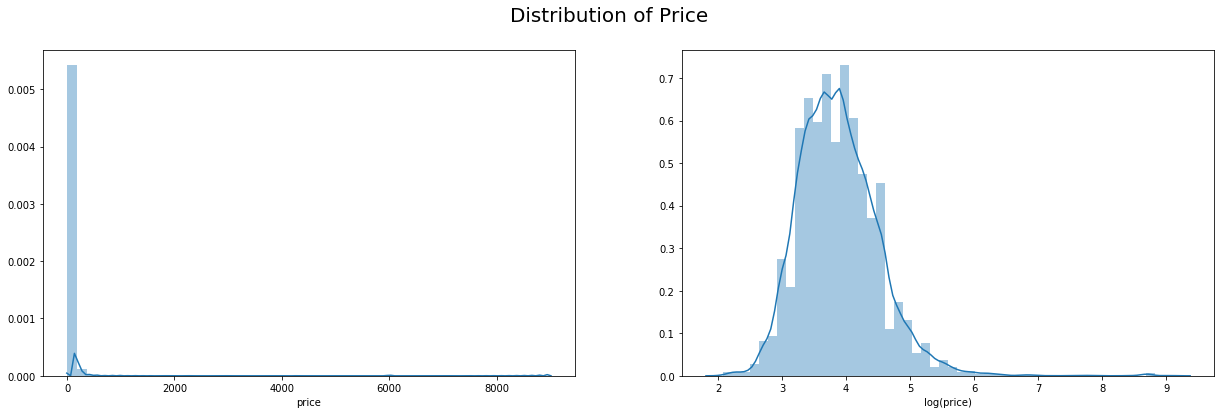

In [27]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df_list['price'], ax=axes[0])
sns.distplot(np.log(df_list['price']), ax=axes[1])
axes[1].set_xlabel('log(price)')
fig.suptitle('Distribution of Price', fontsize=20)

### Number of Property Type, Room Type, Bed Type, Cancellation Policy

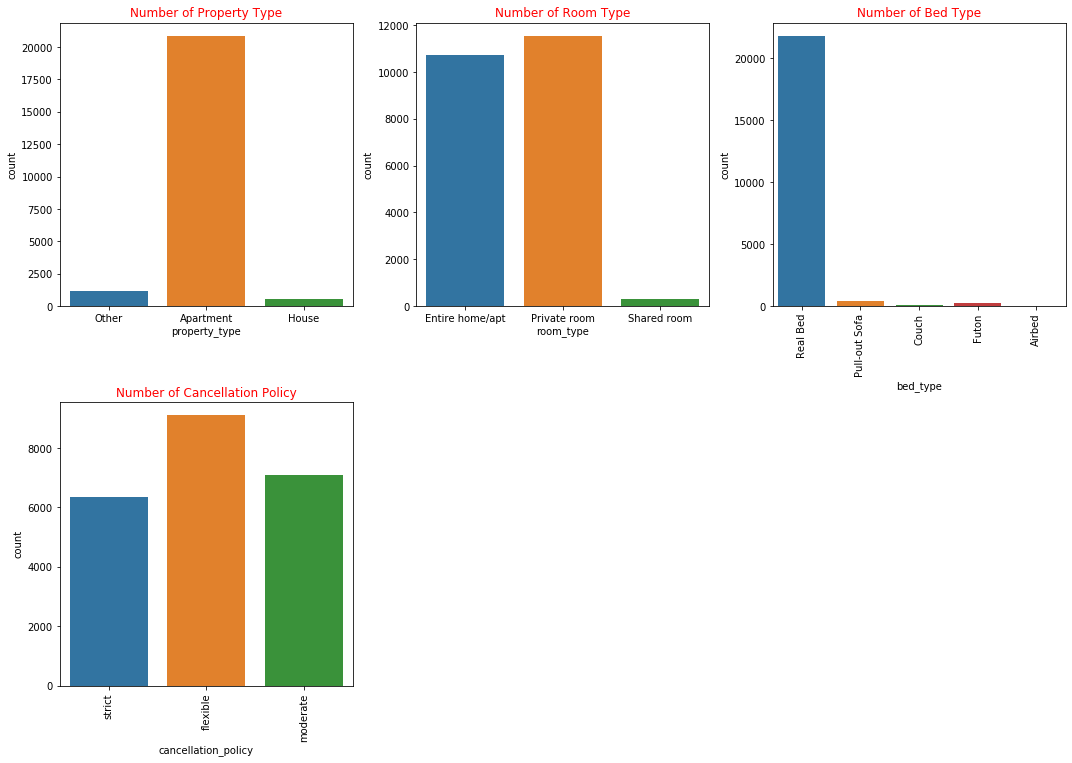

In [8]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(3,3,1)
sns.countplot(x = 'property_type', data = df_list)
ax1.set_title('Number of Property Type', color = 'red')

ax2 = fig.add_subplot(3,3,2)
sns.countplot(x = 'room_type', data = df_list)
ax2.set_title('Number of Room Type', color='red')

ax4 = fig.add_subplot(3,3,3)
sns.countplot(x = 'bed_type', data = df_list)
ax4.set_title('Number of Bed Type', color='red')
plt.xticks(rotation=90)

ax5 = fig.add_subplot(3,3,4)
sns.countplot(x = 'cancellation_policy', data = df_list)
ax5.set_title('Number of Cancellation Policy', color='red')
plt.xticks(rotation=90)
plt.savefig('num_of_prop.png')
fig.tight_layout()  
plt.show()

### Distribution Price With roomtype

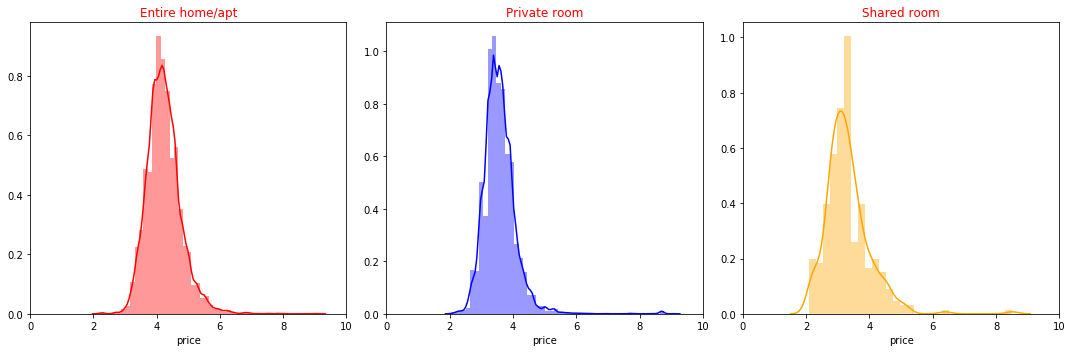

In [9]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
roomtype = ['Entire home/apt','Private room','Shared room']
color = ['red','blue','orange']
i=0
for item in roomtype : 
    sns.distplot(np.log(df_list[df_list['room_type']==item]['price']),color=color[i],label=item,ax=ax[i])
    ax[i].set_title(item,color='red')
    ax[i].set_xlim(0,10)
    i +=1
fig.tight_layout()  
plt.show()

### Distribution Price with Property type

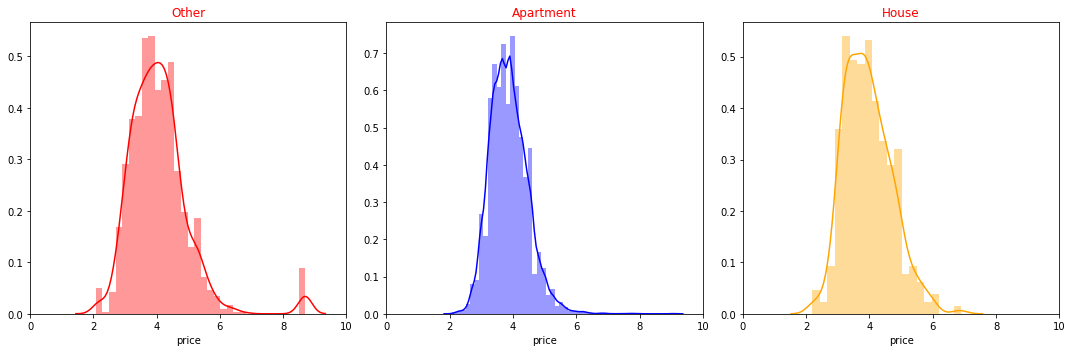

In [10]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
roomtype = ['Other','Apartment','House']
color = ['red','blue','orange']
i=0
for item in roomtype : 
    sns.distplot(np.log(df_list[df_list['property_type']==item]['price']),color=color[i],label=item,ax=ax[i])
    ax[i].set_title(item,color='red')
    ax[i].set_xlim(0,10)
    i +=1
fig.tight_layout()  
plt.show()

### Distribution Price Number of Ammenities

### What is the most common set up airbnb?

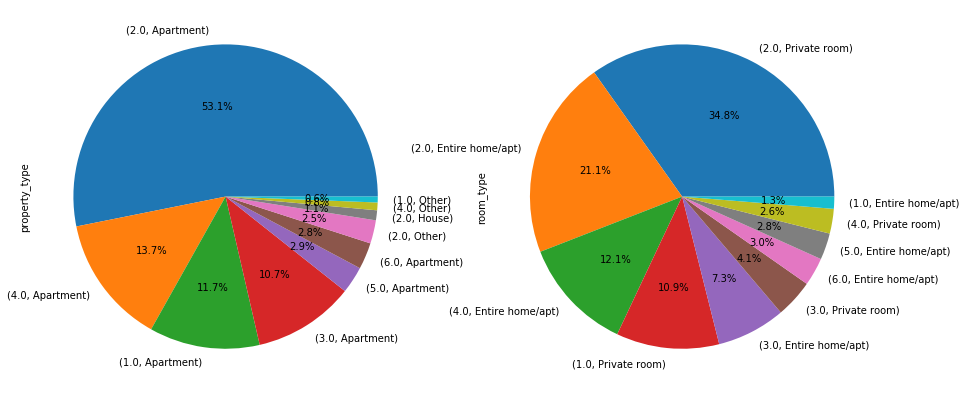

<Figure size 576x576 with 0 Axes>

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15,15))
plt.figure(figsize=(8,8))
df_list.groupby('accommodates').property_type.value_counts().sort_values(ascending=False).iloc[:10].plot(kind = 'pie', autopct='%1.1f%%', fontsize=10, ax=axes[0])
df_list.groupby('accommodates').room_type.value_counts().sort_values(ascending=False).iloc[:10].plot(kind = 'pie', autopct='%1.1f%%', fontsize=10, ax=axes[1])
plt.tight_layout()
plt.show()

### Which Neighbourhood who have the most Listing in Berlin?

In [12]:

lats2018 = df_list['latitude'].tolist()
lons2018 = df_list['longitude'].tolist()
# set tuple into single list
locations = list(zip(lats2018, lons2018))
# show the map of berlin
map1 = folium.Map(location=[52.520008, 13.404954], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

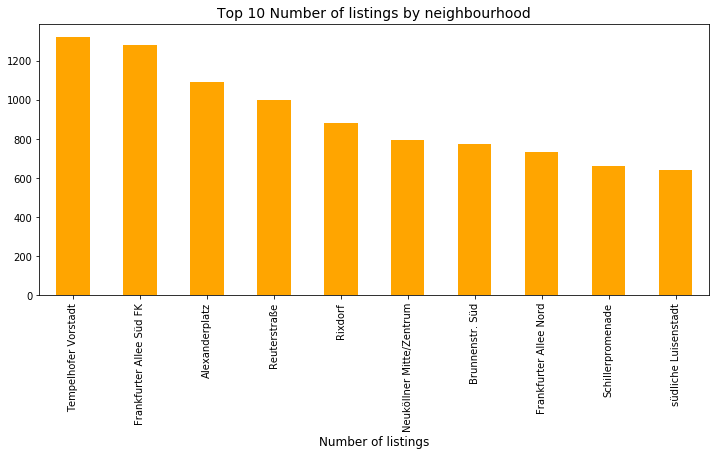

In [13]:
neighbourhood = df_list['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).iloc[:10]
neighbourhood.plot(kind='bar',figsize=(12,5), color='orange')
plt.title("Top 10 Number of listings by neighbourhood", fontsize=14)
plt.xlabel('Number of listings', fontsize=12)
plt.savefig('num_listings.png')
plt.show()

### Which Neighborhood is Expensive?

In [14]:
# drop the nighbourhood_group columns
map_df.drop('neighbourhood_group', axis=1, inplace=True)
# group by average of price
feq = df_list.groupby('neighbourhood_cleansed').price.mean()
# set to dataframe
feq = pd.DataFrame([feq])
# set to transpose
feq = feq.transpose()
# combine the dataframe
map_df = map_df.merge(feq, left_on='neighbourhood', right_on='neighbourhood_cleansed')
# rename price into avg_pice 
map_df.rename(columns={'price': 'avg_price'}, inplace=True)
# round the average price
map_df.avg_price = map_df.avg_price.round(decimals=0)
# set into dictionary
map_dict = map_df.set_index('neighbourhood')['avg_price'].to_dict()
# set the color
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map2 = folium.Map(location=[52.520008, 13.404954], zoom_start=11)
folium.GeoJson(data=map_df,
               name='Berlin',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood','avg_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map2)
map2

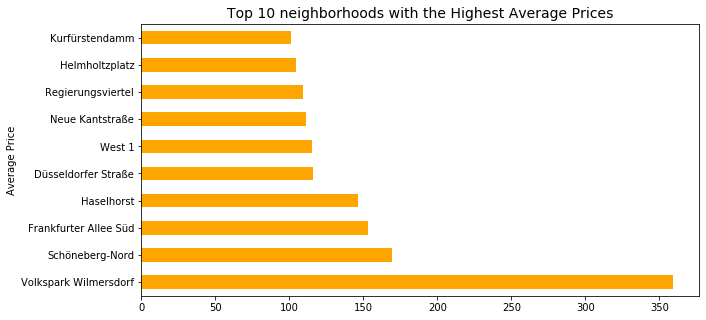

In [15]:
plt.figure(figsize = (10,5))
df_list.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh', color='orange')
plt.title('Top 10 neighborhoods with the Highest Average Prices', fontsize=14)
plt.ylabel('Average Price')
plt.savefig('3.png',dpi=100)
plt.show()

### Which Neighbourhood is the best?

In [16]:
rating = df_list.groupby('neighbourhood_cleansed').review_scores_rating.mean()
rating = pd.DataFrame([rating])
rating= rating.transpose()

map_df = map_df.merge(rating, left_on='neighbourhood', right_on='neighbourhood_cleansed')
map_df.rename(columns={'review_scores_rating': 'rating'}, inplace=True)
map_df.rating = map_df.rating.round(decimals=0)
map_dict = map_df.set_index('neighbourhood')['rating'].to_dict()
color_scale = LinearColormap(['red','green'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[52.520008, 13.404954], zoom_start=11)
folium.GeoJson(data=map_df,
               name='Berlin',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood','rating'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

Text(0.5, 0, 'Average Rating')

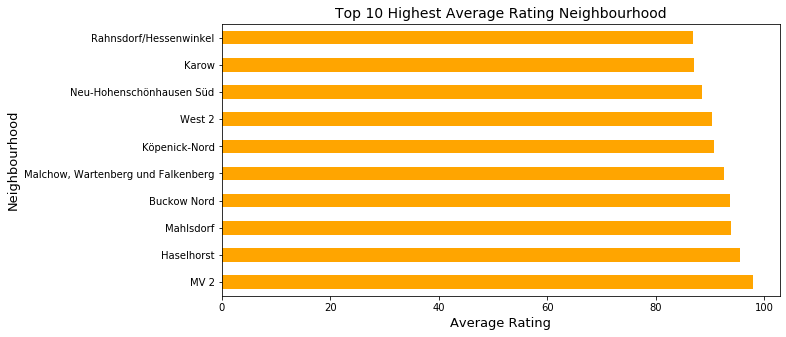

In [17]:
plt.figure(figsize = (10,5))
df_list.groupby('neighbourhood_cleansed').review_scores_rating.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh', color='orange')
plt.title('Top 10 Highest Average Rating Neighbourhood', fontsize=14)
plt.ylabel('Neighbourhood', fontsize= 13)
plt.xlabel('Average Rating', fontsize= 13)

###  Which Neighbourhood with Expensive Cleaning Fee ?

In [18]:
cleaning_fee = df_list.groupby('neighbourhood_cleansed').cleaning_fee.mean()
cleaning_fee = pd.DataFrame([cleaning_fee])
cleaning_fee= cleaning_fee.transpose()

map_df = map_df.merge(cleaning_fee, left_on='neighbourhood', right_on='neighbourhood_cleansed')
map_df.cleaning_fee = map_df.cleaning_fee.round(decimals=0)
map_dict = map_df.set_index('neighbourhood')['cleaning_fee'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map4 = folium.Map(location=[52.520008, 13.404954], zoom_start=11)
folium.GeoJson(data=map_df,
               name='Berlin',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood','cleaning_fee'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map4)
map4

Text(0.5, 0, 'Average Cleaning Fee')

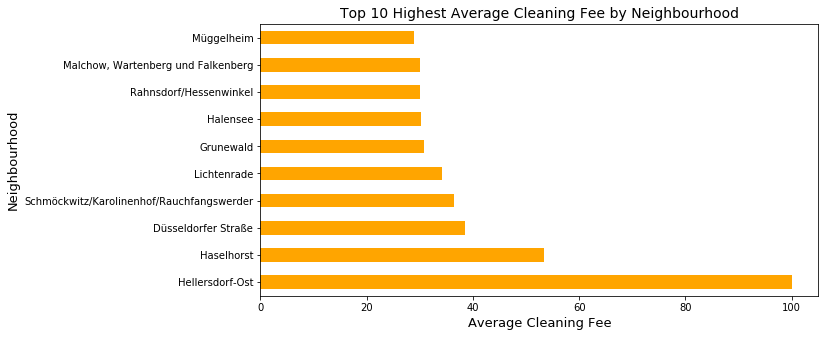

In [19]:
plt.figure(figsize = (10,5))
df_list.groupby('neighbourhood_cleansed').cleaning_fee.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh', color='orange')
plt.title('Top 10 Highest Average Cleaning Fee by Neighbourhood', fontsize=14)
plt.ylabel('Neighbourhood', fontsize= 13)
plt.xlabel('Average Cleaning Fee', fontsize= 13)

### Which Neighborhood Security Deposit is Expensive ?

In [20]:
security_deposit = df_list.groupby('neighbourhood_cleansed').security_deposit.mean()
security_deposit = pd.DataFrame([security_deposit])
security_deposit = security_deposit.transpose()

map_df = map_df.merge(security_deposit, left_on='neighbourhood', right_on='neighbourhood_cleansed')
map_df.security_deposit = map_df.security_deposit.round(decimals=0)
map_dict = map_df.set_index('neighbourhood')['security_deposit'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map5 = folium.Map(location=[52.520008, 13.404954], zoom_start=11)
folium.GeoJson(data=map_df,
               name='Berlin',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood','security_deposit'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map5)
map5

Text(0.5, 0, 'Average Security Deposit')

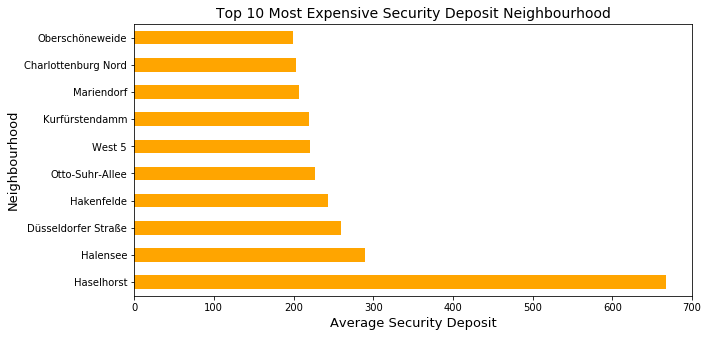

In [21]:
plt.figure(figsize = (10,5))
df_list.groupby('neighbourhood_cleansed').security_deposit.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh', color='orange')
plt.title('Top 10 Most Expensive Security Deposit Neighbourhood', fontsize=14)
plt.ylabel('Neighbourhood', fontsize= 13)
plt.xlabel('Average Security Deposit', fontsize= 13)

### Average price for Airbnb with accommodation for different number of guests

Text(0.5, 0, 'Number of guests accommodated')

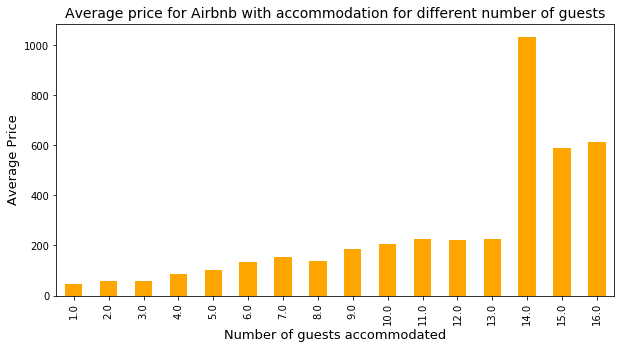

In [22]:
plt.figure(figsize = (10,5))
df_list.groupby('accommodates').price.mean().plot(kind='bar', color='orange')
plt.title('Average price for Airbnb with accommodation for different number of guests', fontsize=14)
plt.ylabel('Average Price', fontsize= 13)
plt.xlabel('Number of guests accommodated', fontsize= 13)

### Average price for Airbnb with different number of bedrooms

Text(0.5, 0, 'Number of Bedrooms')

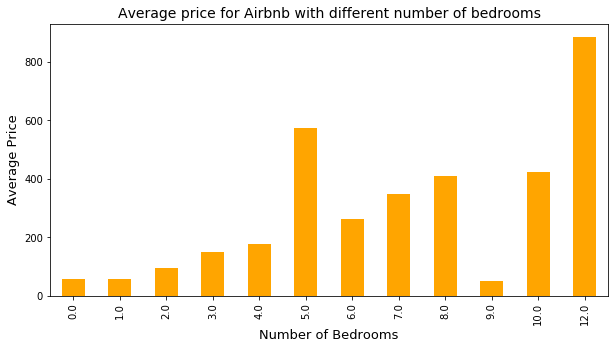

In [23]:
plt.figure(figsize = (10,5))
df_list.groupby('bedrooms').price.mean().plot(kind='bar', color='orange')
plt.title('Average price for Airbnb with different number of bedrooms', fontsize=14)
plt.ylabel('Average Price', fontsize= 13)
plt.xlabel('Number of Bedrooms', fontsize= 13)

### Average price for Airbnb with different number of bathrooms

Text(0.5, 0, 'Number of Bathrooms')

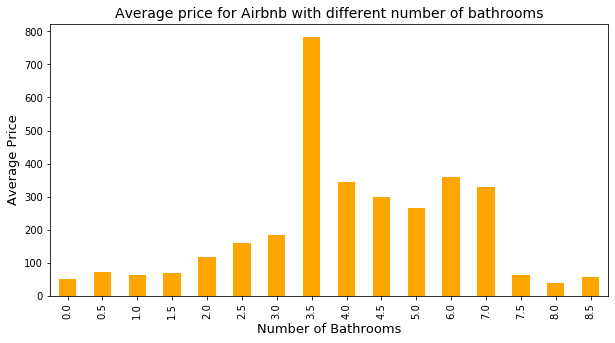

In [24]:
plt.figure(figsize = (10,5))
df_list.groupby('bathrooms').price.mean().plot(kind='bar', color='orange')
plt.title('Average price for Airbnb with different number of bathrooms', fontsize=14)
plt.ylabel('Average Price', fontsize= 13)
plt.xlabel('Number of Bathrooms', fontsize= 13)

### Correlation between Features

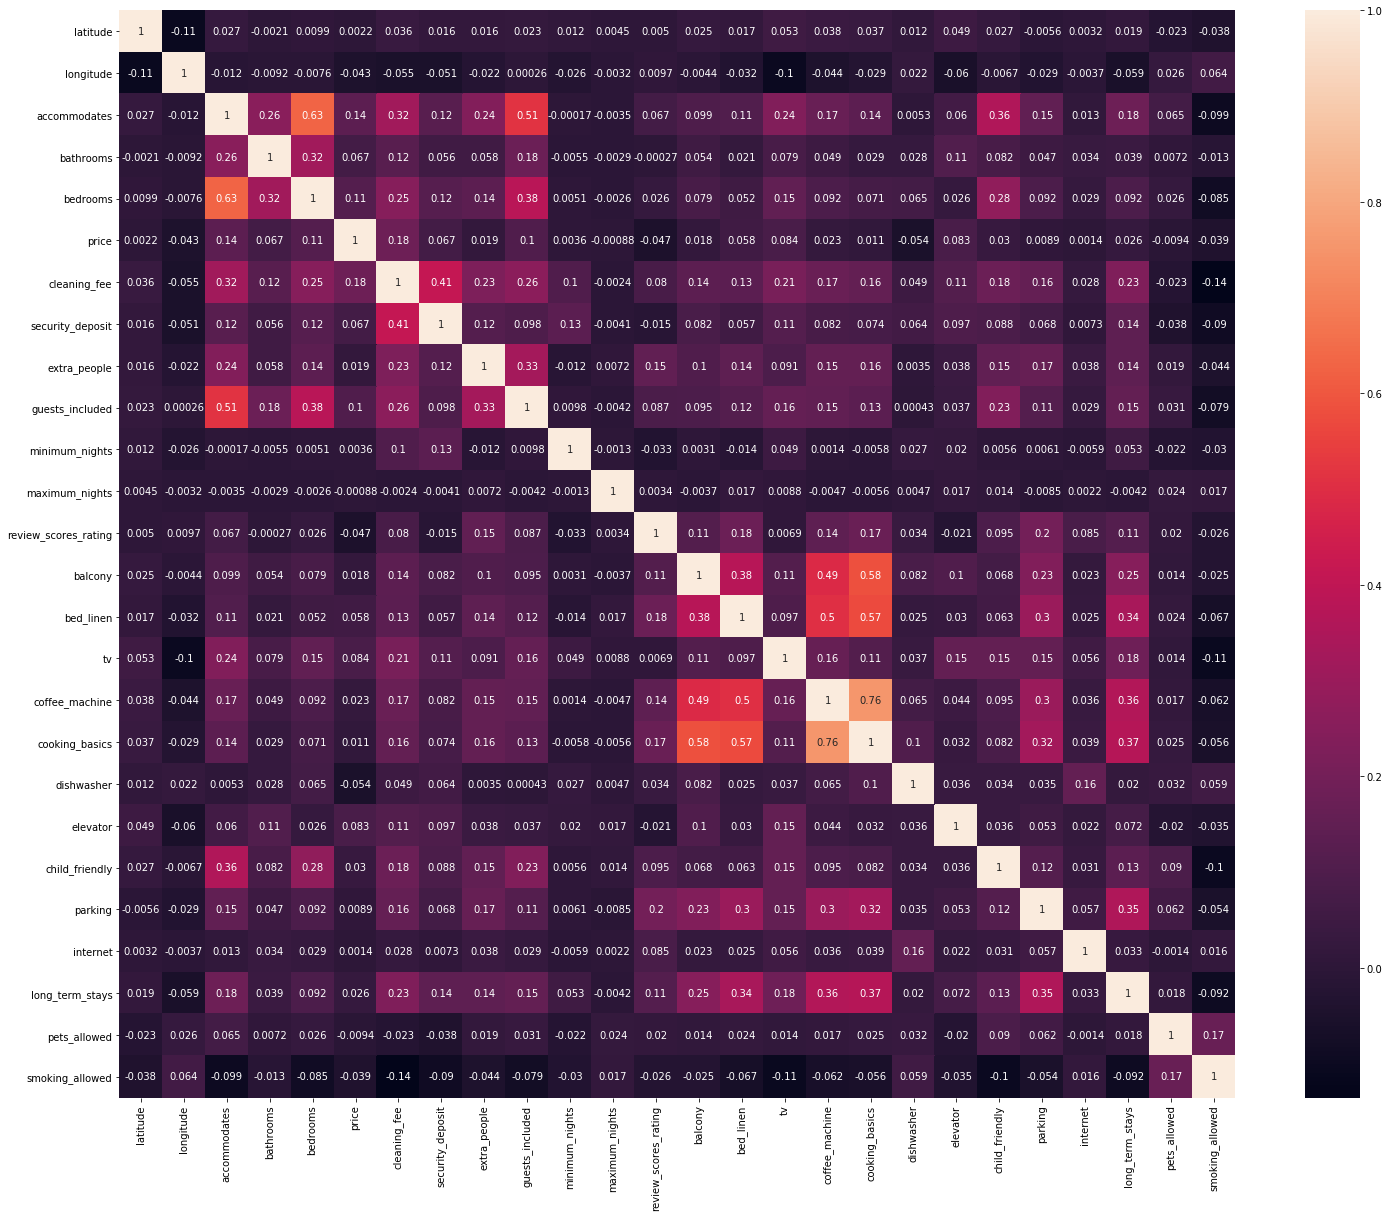

In [25]:
plt.figure(figsize=(25,20))
sns.heatmap(df_list.corr(), annot=True)